In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from math import isnan
from sklearn.preprocessing import OneHotEncoder

# Load the train data

In [281]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [304]:
trainDF = pd.read_excel("/content/train.xlsx")
testDF = pd.read_excel("/content/test.xlsx")

# Data Insight

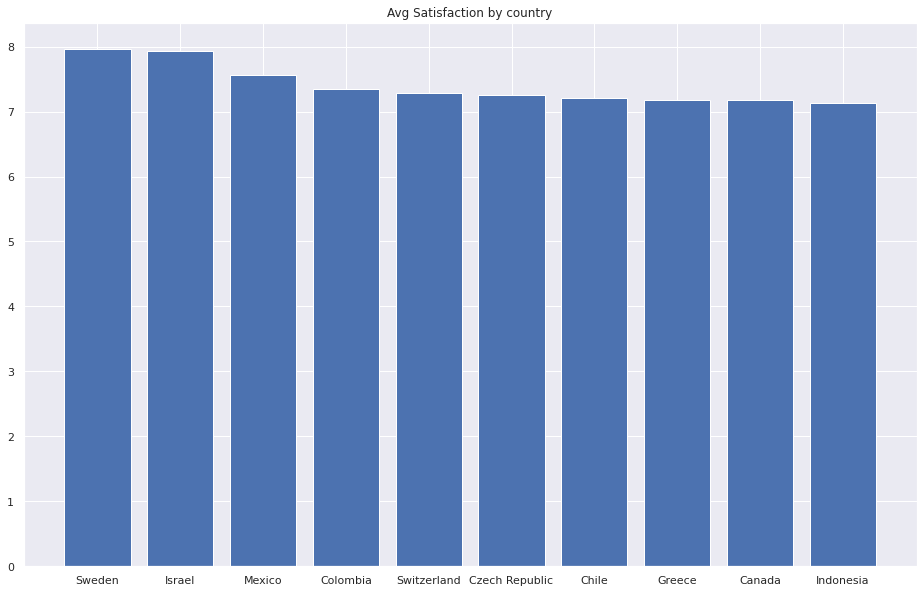

In [305]:
grouped = trainDF.groupby(["Country"],as_index=False)["JobSatisfaction"].mean()
grouped = grouped.sort_values(by = "JobSatisfaction",ascending=False)
groupedValues = grouped["Country"].values[:10]
avgSatisfaction = grouped["JobSatisfaction"].values[:10]
plt.title('Avg Satisfaction by country')
plt.bar(groupedValues,avgSatisfaction)
plt.show()

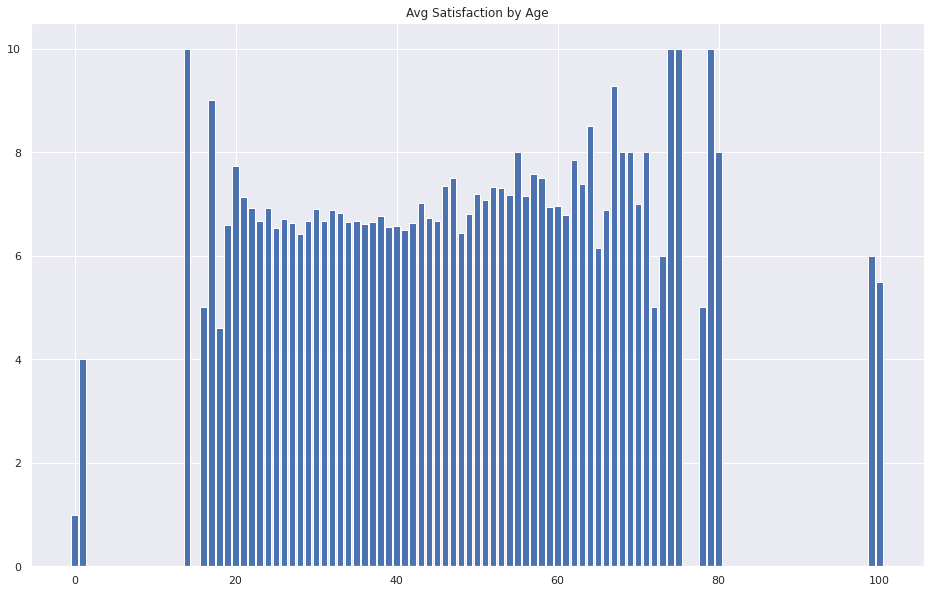

In [306]:
grouped = trainDF.groupby(["Age"],as_index=False)["JobSatisfaction"].mean()
grouped = grouped.sort_values(by = "JobSatisfaction",ascending=False)
groupedValues = grouped["Age"].values
avgSatisfaction = grouped["JobSatisfaction"].values
plt.title('Avg Satisfaction by Age')
plt.bar(groupedValues,avgSatisfaction)
plt.show()

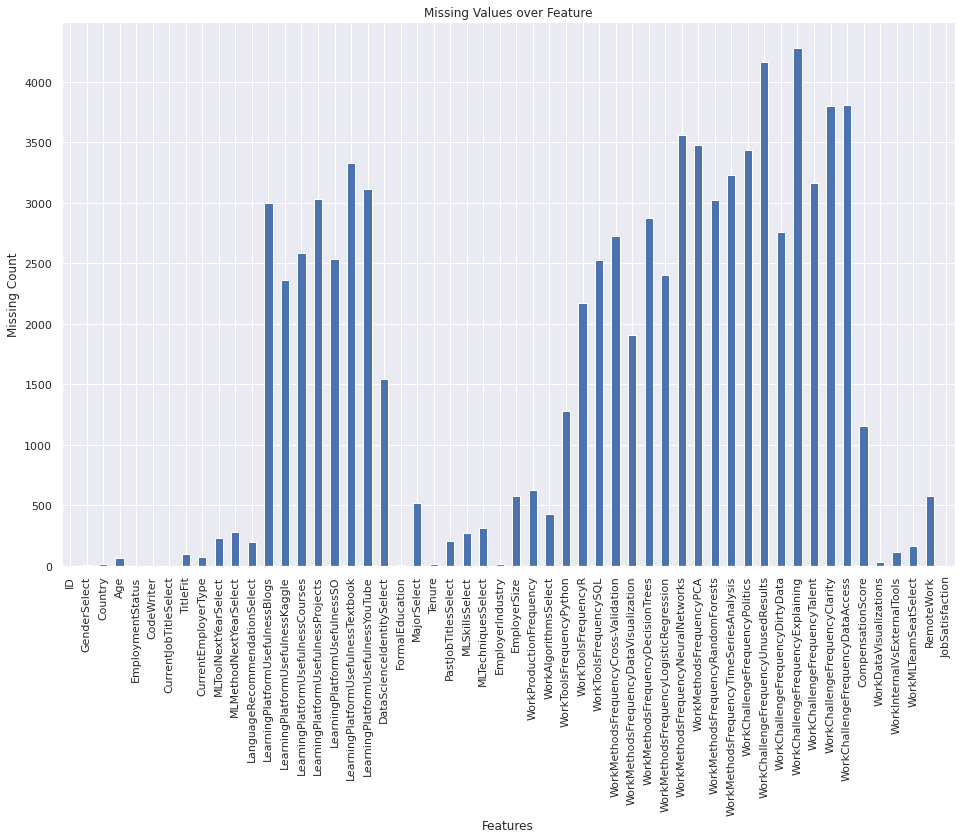

In [307]:
sn.set(rc={'figure.figsize':(16,10)},font_scale=1  )
pd.isnull(trainDF).sum().plot(kind='bar')
plt.ylabel('Missing Count')
plt.xlabel('Features')
plt.title('Missing Values over Feature');

Text(0, 0.5, 'Count')

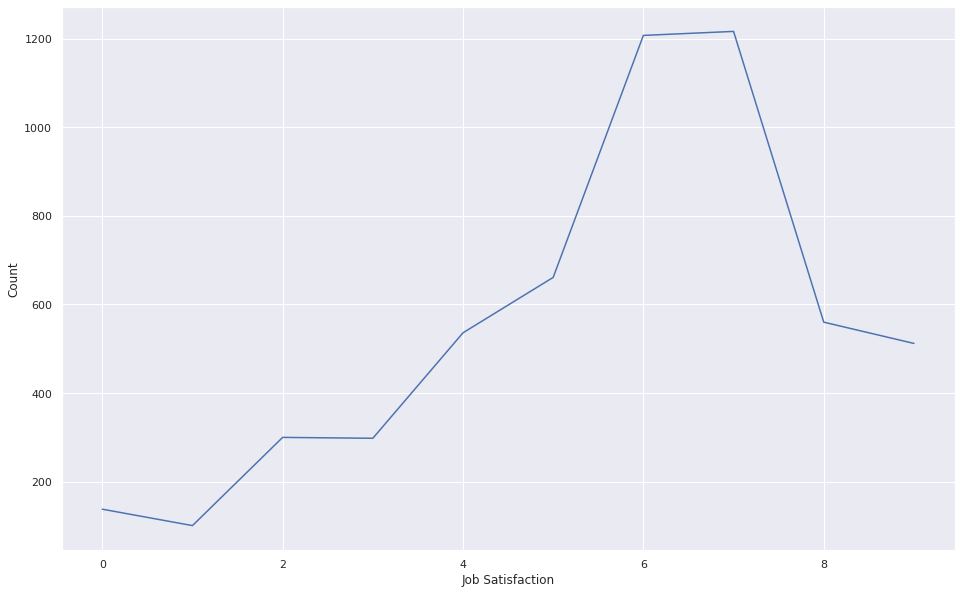

In [308]:
grouped = trainDF.groupby("JobSatisfaction").agg("count")
x = grouped["ID"].values
y = [i for i in range(10)]
plt.plot(y,x)
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")

In [309]:
trainDF.shape

(5529, 54)

In [310]:
trainDF.dtypes

ID                                          int64
GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CodeWriter                                 object
CurrentJobTitleSelect                      object
TitleFit                                   object
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs            object
LearningPlatformUsefulnessKaggle           object
LearningPlatformUsefulnessCourses          object
LearningPlatformUsefulnessProjects         object
LearningPlatformUsefulnessSO               object
LearningPlatformUsefulnessTextbook         object
LearningPlatformUsefulnessYouTube          object
DataScienceIdentitySelect                  object


In [311]:
info = pd.DataFrame(trainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      5529 non-null   int64  
 1   GenderSelect                            5519 non-null   object 
 2   Country                                 5513 non-null   object 
 3   Age                                     5461 non-null   float64
 4   EmploymentStatus                        5529 non-null   object 
 5   CodeWriter                              5529 non-null   object 
 6   CurrentJobTitleSelect                   5527 non-null   object 
 7   TitleFit                                5427 non-null   object 
 8   CurrentEmployerType                     5458 non-null   object 
 9   MLToolNextYearSelect                    5298 non-null   object 
 10  MLMethodNextYearSelect                  5252 non-null   obje

In [312]:
trainDF.nunique()

ID                                        5529
GenderSelect                                 4
Country                                     52
Age                                         68
EmploymentStatus                             3
CodeWriter                                   1
CurrentJobTitleSelect                       16
TitleFit                                     3
CurrentEmployerType                         70
MLToolNextYearSelect                        50
MLMethodNextYearSelect                      25
LanguageRecommendationSelect                13
LearningPlatformUsefulnessBlogs              3
LearningPlatformUsefulnessKaggle             3
LearningPlatformUsefulnessCourses            3
LearningPlatformUsefulnessProjects           3
LearningPlatformUsefulnessSO                 3
LearningPlatformUsefulnessTextbook           3
LearningPlatformUsefulnessYouTube            3
DataScienceIdentitySelect                    3
FormalEducation                              7
MajorSelect  

In [313]:
trainDF["CodeWriter"].isna().sum()

0

No nan values, all yes therefore this is not needed

In [314]:
# TRY
columnsToDrop = ["CodeWriter","GenderSelect","ID","RemoteWork","Country","MLTechniquesSelect","PastJobTitlesSelect"]
trainDF.drop(columns=columnsToDrop,inplace=True)
testDF.drop(columns=columnsToDrop,inplace=True)

In [315]:
display(trainDF.isna().any())

Age                                        True
EmploymentStatus                          False
CurrentJobTitleSelect                      True
TitleFit                                   True
CurrentEmployerType                        True
MLToolNextYearSelect                       True
MLMethodNextYearSelect                     True
LanguageRecommendationSelect               True
LearningPlatformUsefulnessBlogs            True
LearningPlatformUsefulnessKaggle           True
LearningPlatformUsefulnessCourses          True
LearningPlatformUsefulnessProjects         True
LearningPlatformUsefulnessSO               True
LearningPlatformUsefulnessTextbook         True
LearningPlatformUsefulnessYouTube          True
DataScienceIdentitySelect                  True
FormalEducation                            True
MajorSelect                                True
Tenure                                     True
MLSkillsSelect                             True
EmployerIndustry                        

We see that this data frame has so much null values. Data should be cleaned from those values

In [316]:
trainDF.select_dtypes(include=np.number).columns.tolist() # numeric columns

['Age', 'CompensationScore', 'JobSatisfaction']

Only numeric columns are ['ID', 'Age', 'CompensationScore', 'JobSatisfaction'] other columns should be converted into numerical values.

In [317]:
trainDF.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,MLSkillsSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,JobSatisfaction
0,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,Survival Analysis,Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,4
1,26.0,Employed full-time,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Natural Language Processing,Supervised Machine...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,7
2,34.0,Employed full-time,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,Supervised Machine Learning (Tabular Data),Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,6
3,33.0,Employed full-time,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,Computer Vision,Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,9
4,35.0,Employed full-time,Software Developer/Software Engineer,Fine,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,NaN,Very useful,Somewhat useful,NaN,NaN,Very useful,NaN,No,Doctoral degree,Mathematics or statistics,More than 10 years,Computer Vision,Internet-based,"10,000 or more employees",Sometimes,"Bayesian Techniques,CNNs,Regression/Logistic R...",Most of the time,NaN,NaN,Most of the time,Most of the time,NaN,Sometimes,Most of the time,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,8.0,100% of projects,Entirely internal,Other,8


In [318]:
tenureMap = {'3 to 5 years':0,'1 to 2 years':1,'6 to 10 years':2,'More than 10 years':3,'Less than a year':4,"I don't write code to analyze data":5}
trainDF["Tenure"] = trainDF["Tenure"].replace(tenureMap)
trainDF["Tenure"].fillna((trainDF["Tenure"].median()), inplace=True)
trainDF["Tenure"].unique()

testDF["Tenure"] = testDF["Tenure"].replace(tenureMap)
testDF["Tenure"].fillna((testDF["Tenure"].median()), inplace=True)
testDF["Tenure"].unique()

array([3., 2., 1., 0., 4., 5.])

In [319]:
trainDF["EmployerSize"].unique()
sizeMap = {}
i = -1
for col in trainDF["EmployerSize"].unique():
  sizeMap[col] = i
  i = i+1
for k,v in sizeMap.items():
  if v == -1:
    sizeMap.pop(k)
    break
trainDF["EmployerSize"] = trainDF["EmployerSize"].replace(sizeMap)
trainDF["EmployerSize"].fillna((trainDF["EmployerSize"].median()), inplace=True)

testDF["EmployerSize"] = testDF["EmployerSize"].replace(sizeMap)
testDF["EmployerSize"].fillna((testDF["EmployerSize"].median()), inplace=True)

In [320]:
trainDF["WorkDataVisualizations"].unique()
visMap = {}
i = 0
for col in trainDF["WorkDataVisualizations"].unique():
  visMap[col] = i
  i = i+1

In [321]:
print(visMap)
for k,v in visMap.items():
  if v == 7:
    visMap.pop(k)
    break
trainDF["WorkDataVisualizations"] = trainDF["WorkDataVisualizations"].replace(visMap)
trainDF["WorkDataVisualizations"].fillna((trainDF["WorkDataVisualizations"].median()), inplace=True)

testDF["WorkDataVisualizations"] = testDF["WorkDataVisualizations"].replace(visMap)
testDF["WorkDataVisualizations"].fillna((testDF["WorkDataVisualizations"].median()), inplace=True)

{'51-75% of projects': 0, '100% of projects': 1, '10-25% of projects': 2, '76-99% of projects': 3, 'Less than 10% of projects': 4, '26-50% of projects': 5, 'None': 6, nan: 7}


In [300]:
trainDF.columns

Index(['Age', 'EmploymentStatus', 'CurrentJobTitleSelect', 'TitleFit',
       'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube', 'DataScienceIdentitySelect',
       'FormalEducation', 'MajorSelect', 'Tenure', 'MLSkillsSelect',
       'EmployerIndustry', 'EmployerSize', 'WorkProductionFrequency',
       'WorkAlgorithmsSelect', 'WorkToolsFrequencyPython',
       'WorkToolsFrequencyR', 'WorkToolsFrequencySQL',
       'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFr

In [322]:
freqMap =  {}

i = 0
for elt in trainDF["WorkProductionFrequency"].unique():
  freqMap[elt] = i
  i = i+1


for k,v in freqMap.items():
  if v == 6:
    freqMap.pop(k)
    break
print(freqMap)
freqMap["Often"] = 6

{'Always': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Never': 4, "Don't know": 5}


In [323]:
print(freqMap)

{'Always': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Never': 4, "Don't know": 5, 'Often': 6}


In [324]:

trainDF["WorkProductionFrequency"] = trainDF["WorkProductionFrequency"].replace(freqMap)
trainDF["WorkProductionFrequency"].fillna((trainDF["WorkProductionFrequency"].median()), inplace=True)

trainDF["WorkToolsFrequencyPython"] = trainDF["WorkToolsFrequencyPython"].replace(freqMap)
trainDF["WorkToolsFrequencyPython"].fillna((trainDF["WorkToolsFrequencyPython"].median()), inplace=True)

trainDF["WorkToolsFrequencyR"] = trainDF["WorkToolsFrequencyR"].replace(freqMap)
trainDF["WorkToolsFrequencyR"].fillna((trainDF["WorkToolsFrequencyR"].median()), inplace=True)

trainDF["WorkToolsFrequencySQL"] = trainDF["WorkToolsFrequencySQL"].replace(freqMap)
trainDF["WorkToolsFrequencySQL"].fillna((trainDF["WorkToolsFrequencySQL"].median()), inplace=True)




testDF["WorkProductionFrequency"] = testDF["WorkProductionFrequency"].replace(freqMap)
testDF["WorkProductionFrequency"].fillna((testDF["WorkProductionFrequency"].median()), inplace=True)

testDF["WorkToolsFrequencyPython"] = testDF["WorkToolsFrequencyPython"].replace(freqMap)
testDF["WorkToolsFrequencyPython"].fillna((testDF["WorkToolsFrequencyPython"].median()), inplace=True)

testDF["WorkToolsFrequencyR"] = testDF["WorkToolsFrequencyR"].replace(freqMap)
testDF["WorkToolsFrequencyR"].fillna((testDF["WorkToolsFrequencyR"].median()), inplace=True)

testDF["WorkToolsFrequencySQL"] = testDF["WorkToolsFrequencySQL"].replace(freqMap)
testDF["WorkToolsFrequencySQL"].fillna((testDF["WorkToolsFrequencySQL"].median()), inplace=True)


In [325]:
trainDF["WorkMethodsFrequencyCross-Validation"] = trainDF["WorkMethodsFrequencyCross-Validation"].replace(freqMap)
trainDF["WorkMethodsFrequencyCross-Validation"].fillna((trainDF["WorkMethodsFrequencyCross-Validation"].median()), inplace=True)


trainDF["WorkMethodsFrequencyDataVisualization"] = trainDF["WorkMethodsFrequencyDataVisualization"].replace(freqMap)
trainDF["WorkMethodsFrequencyDataVisualization"].fillna((trainDF["WorkMethodsFrequencyDataVisualization"].median()), inplace=True)


trainDF["WorkMethodsFrequencyLogisticRegression"] = trainDF["WorkMethodsFrequencyLogisticRegression"].replace(freqMap)
trainDF["WorkMethodsFrequencyLogisticRegression"].fillna((trainDF["WorkMethodsFrequencyLogisticRegression"].median()), inplace=True)


trainDF["WorkChallengeFrequencyDirtyData"] = trainDF["WorkChallengeFrequencyDirtyData"].replace(freqMap)
trainDF["WorkChallengeFrequencyDirtyData"].fillna((trainDF["WorkChallengeFrequencyDirtyData"].median()), inplace=True)


trainDF["WorkChallengeFrequencyExplaining"] = trainDF["WorkChallengeFrequencyExplaining"].replace(freqMap)
trainDF["WorkChallengeFrequencyExplaining"].fillna((trainDF["WorkChallengeFrequencyExplaining"].median()), inplace=True)


trainDF["WorkChallengeFrequencyTalent"] = trainDF["WorkChallengeFrequencyTalent"].replace(freqMap)
trainDF["WorkChallengeFrequencyTalent"].fillna((trainDF["WorkChallengeFrequencyTalent"].median()), inplace=True)


trainDF["WorkChallengeFrequencyClarity"] = trainDF["WorkChallengeFrequencyClarity"].replace(freqMap)
trainDF["WorkChallengeFrequencyClarity"].fillna((trainDF["WorkChallengeFrequencyClarity"].median()), inplace=True)


trainDF["WorkChallengeFrequencyDataAccess"] = trainDF["WorkChallengeFrequencyDataAccess"].replace(freqMap)
trainDF["WorkChallengeFrequencyDataAccess"].fillna((trainDF["WorkChallengeFrequencyDataAccess"].median()), inplace=True)


trainDF["WorkMethodsFrequencyNeuralNetworks"] = trainDF["WorkMethodsFrequencyNeuralNetworks"].replace(freqMap)
trainDF["WorkMethodsFrequencyNeuralNetworks"].fillna((trainDF["WorkMethodsFrequencyNeuralNetworks"].median()), inplace=True)


trainDF["WorkMethodsFrequencyPCA"] = trainDF["WorkMethodsFrequencyPCA"].replace(freqMap)
trainDF["WorkMethodsFrequencyPCA"].fillna((trainDF["WorkMethodsFrequencyPCA"].median()), inplace=True)


trainDF["WorkMethodsFrequencyRandomForests"] = trainDF["WorkMethodsFrequencyRandomForests"].replace(freqMap)
trainDF["WorkMethodsFrequencyRandomForests"].fillna((trainDF["WorkMethodsFrequencyRandomForests"].median()), inplace=True)


trainDF["WorkMethodsFrequencyTimeSeriesAnalysis"] = trainDF["WorkMethodsFrequencyTimeSeriesAnalysis"].replace(freqMap)
trainDF["WorkMethodsFrequencyTimeSeriesAnalysis"].fillna((trainDF["WorkMethodsFrequencyTimeSeriesAnalysis"].median()), inplace=True)


trainDF["WorkChallengeFrequencyPolitics"] = trainDF["WorkChallengeFrequencyPolitics"].replace(freqMap)
trainDF["WorkChallengeFrequencyPolitics"].fillna((trainDF["WorkChallengeFrequencyPolitics"].median()), inplace=True)

trainDF["WorkChallengeFrequencyUnusedResults"] = trainDF["WorkChallengeFrequencyUnusedResults"].replace(freqMap)
trainDF["WorkChallengeFrequencyUnusedResults"].fillna((trainDF["WorkChallengeFrequencyUnusedResults"].median()), inplace=True)

trainDF["WorkMethodsFrequencyDecisionTrees"] = trainDF["WorkMethodsFrequencyDecisionTrees"].replace(freqMap)
trainDF["WorkMethodsFrequencyDecisionTrees"].fillna((trainDF["WorkMethodsFrequencyDecisionTrees"].median()), inplace=True)






testDF["WorkMethodsFrequencyCross-Validation"] = testDF["WorkMethodsFrequencyCross-Validation"].replace(freqMap)
testDF["WorkMethodsFrequencyCross-Validation"].fillna((testDF["WorkMethodsFrequencyCross-Validation"].median()), inplace=True)


testDF["WorkMethodsFrequencyDataVisualization"] = testDF["WorkMethodsFrequencyDataVisualization"].replace(freqMap)
testDF["WorkMethodsFrequencyDataVisualization"].fillna((testDF["WorkMethodsFrequencyDataVisualization"].median()), inplace=True)


testDF["WorkMethodsFrequencyLogisticRegression"] = testDF["WorkMethodsFrequencyLogisticRegression"].replace(freqMap)
testDF["WorkMethodsFrequencyLogisticRegression"].fillna((testDF["WorkMethodsFrequencyLogisticRegression"].median()), inplace=True)


testDF["WorkChallengeFrequencyDirtyData"] = testDF["WorkChallengeFrequencyDirtyData"].replace(freqMap)
testDF["WorkChallengeFrequencyDirtyData"].fillna((testDF["WorkChallengeFrequencyDirtyData"].median()), inplace=True)


testDF["WorkChallengeFrequencyExplaining"] = testDF["WorkChallengeFrequencyExplaining"].replace(freqMap)
testDF["WorkChallengeFrequencyExplaining"].fillna((testDF["WorkChallengeFrequencyExplaining"].median()), inplace=True)


testDF["WorkChallengeFrequencyTalent"] = testDF["WorkChallengeFrequencyTalent"].replace(freqMap)
testDF["WorkChallengeFrequencyTalent"].fillna((testDF["WorkChallengeFrequencyTalent"].median()), inplace=True)


testDF["WorkChallengeFrequencyClarity"] = testDF["WorkChallengeFrequencyClarity"].replace(freqMap)
testDF["WorkChallengeFrequencyClarity"].fillna((testDF["WorkChallengeFrequencyClarity"].median()), inplace=True)


testDF["WorkChallengeFrequencyDataAccess"] = testDF["WorkChallengeFrequencyDataAccess"].replace(freqMap)
testDF["WorkChallengeFrequencyDataAccess"].fillna((testDF["WorkChallengeFrequencyDataAccess"].median()), inplace=True)


testDF["WorkMethodsFrequencyNeuralNetworks"] = testDF["WorkMethodsFrequencyNeuralNetworks"].replace(freqMap)
testDF["WorkMethodsFrequencyNeuralNetworks"].fillna((testDF["WorkMethodsFrequencyNeuralNetworks"].median()), inplace=True)


testDF["WorkMethodsFrequencyPCA"] = testDF["WorkMethodsFrequencyPCA"].replace(freqMap)
testDF["WorkMethodsFrequencyPCA"].fillna((testDF["WorkMethodsFrequencyPCA"].median()), inplace=True)


testDF["WorkMethodsFrequencyRandomForests"] = testDF["WorkMethodsFrequencyRandomForests"].replace(freqMap)
testDF["WorkMethodsFrequencyRandomForests"].fillna((testDF["WorkMethodsFrequencyRandomForests"].median()), inplace=True)


testDF["WorkMethodsFrequencyTimeSeriesAnalysis"] = testDF["WorkMethodsFrequencyTimeSeriesAnalysis"].replace(freqMap)
testDF["WorkMethodsFrequencyTimeSeriesAnalysis"].fillna((testDF["WorkMethodsFrequencyTimeSeriesAnalysis"].median()), inplace=True)


testDF["WorkChallengeFrequencyPolitics"] = testDF["WorkChallengeFrequencyPolitics"].replace(freqMap)
testDF["WorkChallengeFrequencyPolitics"].fillna((testDF["WorkChallengeFrequencyPolitics"].median()), inplace=True)

testDF["WorkChallengeFrequencyUnusedResults"] = testDF["WorkChallengeFrequencyUnusedResults"].replace(freqMap)
testDF["WorkChallengeFrequencyUnusedResults"].fillna((testDF["WorkChallengeFrequencyUnusedResults"].median()), inplace=True)

testDF["WorkMethodsFrequencyDecisionTrees"] = testDF["WorkMethodsFrequencyDecisionTrees"].replace(freqMap)
testDF["WorkMethodsFrequencyDecisionTrees"].fillna((testDF["WorkMethodsFrequencyDecisionTrees"].median()), inplace=True)

In [326]:
formalEduMap =  {}

i = 0
for elt in trainDF["FormalEducation"].unique():
  formalEduMap[elt] = i
  i = i+1


for k,v in formalEduMap.items():
  if v == 7:
    formalEduMap.pop(k)
    break

{"Bachelor's degree": 0, "Master's degree": 1, 'Doctoral degree': 2, "Some college/university study without earning a bachelor's degree": 3, 'Professional degree': 4, 'I did not complete any formal education past high school': 5, 'I prefer not to answer': 6}


In [327]:
trainDF["FormalEducation"] = trainDF["FormalEducation"].replace(formalEduMap)
trainDF["FormalEducation"].fillna((trainDF["FormalEducation"].median()), inplace=True)

testDF["FormalEducation"] = testDF["FormalEducation"].replace(formalEduMap)
testDF["FormalEducation"].fillna((testDF["FormalEducation"].median()), inplace=True)

In [328]:
scientistMap = {}
i = 0
for elt in trainDF["DataScienceIdentitySelect"].unique():
  scientistMap[elt] = i
  i = i+1

for k,v in scientistMap.items():
  if v == 2:
    scientistMap.pop(k)
    break


In [329]:
trainDF["DataScienceIdentitySelect"] = trainDF["DataScienceIdentitySelect"].replace(scientistMap)
trainDF["DataScienceIdentitySelect"].fillna((trainDF["DataScienceIdentitySelect"].median()), inplace=True)

testDF["DataScienceIdentitySelect"] = testDF["DataScienceIdentitySelect"].replace(scientistMap)
testDF["DataScienceIdentitySelect"].fillna((testDF["DataScienceIdentitySelect"].median()), inplace=True)

In [330]:
titleMap = {}
i = 0
for elt in trainDF["TitleFit"].unique():
  titleMap[elt] = i
  i = i+1

for k,v in scientistMap.items():
  if v == 3:
    scientistMap.pop(k)
    break

In [331]:
trainDF["TitleFit"] = trainDF["TitleFit"].replace(titleMap)
trainDF["TitleFit"].fillna((trainDF["TitleFit"].median()), inplace=True)

testDF["TitleFit"] = testDF["TitleFit"].replace(titleMap)
testDF["TitleFit"].fillna((testDF["TitleFit"].median()), inplace=True)

In [332]:
foundUsefulMap = {}
i = 0
for elt in trainDF["LearningPlatformUsefulnessKaggle"].unique():
  foundUsefulMap[elt] = i
  i = i+1
for k,v in foundUsefulMap.items():
  if v == 0:
    foundUsefulMap.pop(k)
    break

In [333]:
trainDF["LearningPlatformUsefulnessKaggle"] = trainDF["LearningPlatformUsefulnessKaggle"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessKaggle"].fillna((trainDF["LearningPlatformUsefulnessKaggle"].median()), inplace=True)

trainDF["LearningPlatformUsefulnessCourses"] = trainDF["LearningPlatformUsefulnessCourses"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessCourses"].fillna((trainDF["LearningPlatformUsefulnessCourses"].median()), inplace=True)

trainDF["LearningPlatformUsefulnessProjects"] = trainDF["LearningPlatformUsefulnessProjects"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessProjects"].fillna((trainDF["LearningPlatformUsefulnessProjects"].median()), inplace=True)

trainDF["LearningPlatformUsefulnessSO"] = trainDF["LearningPlatformUsefulnessSO"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessSO"].fillna((trainDF["LearningPlatformUsefulnessSO"].median()), inplace=True)

trainDF["LearningPlatformUsefulnessTextbook"] = trainDF["LearningPlatformUsefulnessTextbook"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessTextbook"].fillna((trainDF["LearningPlatformUsefulnessTextbook"].median()), inplace=True)


testDF["LearningPlatformUsefulnessKaggle"] = testDF["LearningPlatformUsefulnessKaggle"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessKaggle"].fillna((testDF["LearningPlatformUsefulnessKaggle"].median()), inplace=True)

testDF["LearningPlatformUsefulnessCourses"] = testDF["LearningPlatformUsefulnessCourses"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessCourses"].fillna((testDF["LearningPlatformUsefulnessCourses"].median()), inplace=True)

testDF["LearningPlatformUsefulnessProjects"] = testDF["LearningPlatformUsefulnessProjects"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessProjects"].fillna((testDF["LearningPlatformUsefulnessProjects"].median()), inplace=True)

testDF["LearningPlatformUsefulnessSO"] = testDF["LearningPlatformUsefulnessSO"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessSO"].fillna((testDF["LearningPlatformUsefulnessSO"].median()), inplace=True)

testDF["LearningPlatformUsefulnessTextbook"] = testDF["LearningPlatformUsefulnessTextbook"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessTextbook"].fillna((testDF["LearningPlatformUsefulnessTextbook"].median()), inplace=True)



In [334]:
trainDF["LearningPlatformUsefulnessYouTube"] = trainDF["LearningPlatformUsefulnessYouTube"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessYouTube"].fillna((trainDF["LearningPlatformUsefulnessYouTube"].median()), inplace=True)

trainDF["LearningPlatformUsefulnessBlogs"] = trainDF["LearningPlatformUsefulnessBlogs"].replace(foundUsefulMap)
trainDF["LearningPlatformUsefulnessBlogs"].fillna((trainDF["LearningPlatformUsefulnessBlogs"].median()), inplace=True)

testDF["LearningPlatformUsefulnessYouTube"] = testDF["LearningPlatformUsefulnessYouTube"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessYouTube"].fillna((testDF["LearningPlatformUsefulnessYouTube"].median()), inplace=True)

testDF["LearningPlatformUsefulnessBlogs"] = testDF["LearningPlatformUsefulnessBlogs"].replace(foundUsefulMap)
testDF["LearningPlatformUsefulnessBlogs"].fillna((testDF["LearningPlatformUsefulnessBlogs"].median()), inplace=True)

In [336]:
for col in trainDF.select_dtypes(include=np.number).columns.tolist():
  trainDF[col].fillna((trainDF[col].mean()), inplace=True)
  if col != "JobSatisfaction":
    testDF[col].fillna((testDF[col].mean()), inplace=True)

In [337]:
modified = ["Tenure","EmployerSize","WorkDataVisualizations","TitleFit","DataScienceIdentitySelect",
            "FormalEducation","WorkChallengeFrequencyDirtyData",'WorkProductionFrequency','WorkToolsFrequencyPython','WorkToolsFrequencyR',
                'WorkToolsFrequencySQL','WorkMethodsFrequencyCross-Validation','WorkMethodsFrequencyDataVisualization','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses',
               'LearningPlatformUsefulnessSO',"LearningPlatformUsefulnessYouTube","LearningPlatformUsefulnessBlogs","LearningPlatformUsefulnessProjects","LearningPlatformUsefulnessTextbook",
            'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess','WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',"MLTechniquesSelect","PastJobTitlesSelect"]

In [339]:
for col in trainDF.columns:
  if col not in modified:
    trainDF[col].fillna('None', inplace=True)
    if col != "JobSatisfaction":
      testDF[col].fillna('None', inplace=True)

In [340]:
trainDF.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,MLSkillsSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,JobSatisfaction
0,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,0,Self-employed,Python,Link Analysis,SAS,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,"Information technology, networking, or system ...",0.0,Survival Analysis,Technology,4.0,0.0,Random Forests,6.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,8.000000,0.0,Approximately half internal and half external,Standalone Team,4
1,26.0,Employed full-time,Computer Scientist,1,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,Computer Science,1.0,"Natural Language Processing,Supervised Machine...",Government,0.0,1.0,"Bayesian Techniques,SVMs",2.0,6.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,4.445003,1.0,More internal than external,Business Department,7
2,34.0,Employed full-time,Data Analyst,0,Employed by government,TensorFlow,Deep learning,Python,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,Mathematics or statistics,2.0,Supervised Machine Learning (Tabular Data),Government,0.0,1.0,"Neural Networks,Regression/Logistic Regression",2.0,6.0,3.0,6.0,6.0,3.0,3.0,6.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.000000,2.0,More internal than external,Other,6
3,33.0,Employed full-time,Scientist/Researcher,0,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,Engineering (non-computer focused),3.0,Computer Vision,Academic,1.0,2.0,"Markov Logic Networks,Regression/Logistic Regr...",2.0,3.0,3.0,3.0,6.0,3.0,2.0,3.0,6.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.000000,3.0,Do not know,Other,9
4,35.0,Employed full-time,Software Developer/Software Engineer,0,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,Mathematics or statistics,3.0,Computer Vision,Internet-based,2.0,2.0,"Bayesian Techniques,CNNs,Regression/Logistic R...",3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,8.000000,1.0,Entirely internal,Other,8


In [341]:
encoders = list()
for col in trainDF.columns:
  if col not in modified and col != "JobSatisfaction" and col not in trainDF.select_dtypes(include=np.number).columns.tolist():
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit_transform(trainDF[[col]]).toarray()

    xd = enc.fit_transform(trainDF[[col]]).toarray()
    xd = pd.DataFrame(xd,columns=enc.categories_)

    trainDF = pd.merge(trainDF,xd,right_index=True,left_index=True)
    trainDF = trainDF.drop(columns=col)

    testDF = pd.merge(testDF,xd,right_index=True,left_index=True)
    testDF = testDF.drop(columns=col)
trainDF.head()

,Age,TitleFit,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,Tenure,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,JobSatisfaction,"(Employed full-time,)","(Employed part-time,)","(Independent contractor, freelancer, or self-employed,)","(Business Analyst,)","(Computer Scientist,)",...,"(Neural Networks,Regression/Logistic Regression,Other,)","(Neural Networks,Regression/Logistic Regression,RNNs,)","(Neural Networks,Regression/Logistic Regression,RNNs,SVMs,)","(Neural Networks,Regression/Logistic Regression,SVMs,)","(Neural Networks,Regression/Logistic Regression,SVMs,Other,)","(Neural Networks,SVMs,)","(Neural Networks,SVMs,Other,)","('None',)_x","('Other',)_x","(RNNs,)","(RNNs,SVMs,)","(Random Forests_y,)","(Random Forests,Other,)","(Random Forests,RNNs,)","(Random Forests,Regression/Logistic Regression,)","(Random Forests,Regression/Logistic Regression,Other,)","(Random Forests,Regression/Logistic Regression,RNNs,)","(Random Forests,Regression/Logistic Regression,SVMs,)","(Random Forests,Regression/Logistic Regression,SVMs,Other,)","(Random Forests,SVMs,)","(Regression/Logistic Regression,)","(Regression/Logistic Regression,Other,)","(Regression/Logistic Regression,RNNs,)","(Regression/Logistic Regression,SVMs,)","(Regression/Logistic Regression,SVMs,Other,)","(SVMs,)","(SVMs,Other,)","(Approximately half internal and half external,)","(Do not know,)","(Entirely external,)","(Entirely internal,)","(More external than internal,)","(More internal than external,)","(None_y,)","(Business Department,)","(Central Insights Team,)","(IT Department,)","(None,)","(Other_y,)","(Standalone Team,)"
0,28.0,0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,6.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,8.000000,0.0,4,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26.0,1,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,4.445003,1.0,7,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,34.0,0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,6.0,3.0,6.0,6.0,3.0,3.0,6.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.000000,2.0,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,6.0,3.0,2.0,3.0,6.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.000000,3.0,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,8.000000,1.0,8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Trial Part

# Training Machine Learning Model

In [342]:
X = trainDF.drop("JobSatisfaction",axis=1)
Y = trainDF["JobSatisfaction"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Linear Regression Model

In [343]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [344]:
Y_pred_train = model.predict(X_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_train))

Mean squared error (MSE): 2240687272841252352.00
Coefficient of determination (R^2): -485239491003983936.00


In [354]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_train))

Y_pred_test = model.predict(testDF)
import csv
with open('/content/drive/MyDrive/predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Prediction"])
    i = 1
    for pred in Y_pred_test:     
      writer.writerow([i,pred])
      i = i+1

Mean squared error (MSE): 6.14
Coefficient of determination (R^2): -0.33


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

kNN Algorithm

In [349]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = [(2*i+1) for i in range(15)]

# Save the accuracies of each value of kVal in [accuracies] variable
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  
  # Train the k-Nearest Neighbor classifier with the current value of k
  model = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
  model.fit(X_train, Y_train)
  
  # Evaluate the model on validation set 
  score = model.score(X_test, Y_test)
  print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  
  # Update the accuracies list
  accuracies.append(score)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, model.predict(X_test)))


For k = 1, validation accuracy = 12.47740%
For k = 3, validation accuracy = 11.84448%
For k = 5, validation accuracy = 16.09403%
For k = 7, validation accuracy = 18.08318%
For k = 9, validation accuracy = 16.72694%
For k = 11, validation accuracy = 17.45027%
For k = 13, validation accuracy = 17.72152%
For k = 15, validation accuracy = 17.35986%
For k = 17, validation accuracy = 17.99277%
For k = 19, validation accuracy = 18.71609%
For k = 21, validation accuracy = 19.43942%
For k = 23, validation accuracy = 20.52441%
For k = 25, validation accuracy = 20.16275%
For k = 27, validation accuracy = 20.61483%
For k = 29, validation accuracy = 20.88608%
Mean squared error (MSE): 6.29


Neural Network

In [356]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [357]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential([Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(11, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['mean_squared_error','accuracy'])
history = model.fit(
    X_train, 
    Y_train, 
    batch_size=32, 
    epochs=30, 
    validation_split = 0.2,
    verbose=1)

Epoch 1/30
111/111 [==============================] - 1s 7ms/step - loss: 2.2607 - mean_squared_error: 49.9131 - accuracy: 0.1678 - val_loss: 2.1147 - val_mean_squared_error: 50.2827 - val_accuracy: 0.1898
Epoch 2/30
111/111 [==============================] - 0s 4ms/step - loss: 2.1019 - mean_squared_error: 49.0504 - accuracy: 0.2379 - val_loss: 2.1106 - val_mean_squared_error: 50.2830 - val_accuracy: 0.1864
Epoch 3/30
111/111 [==============================] - 0s 4ms/step - loss: 2.0545 - mean_squared_error: 49.4201 - accuracy: 0.2340 - val_loss: 2.0973 - val_mean_squared_error: 50.2833 - val_accuracy: 0.1989
Epoch 4/30
111/111 [==============================] - 0s 4ms/step - loss: 1.9891 - mean_squared_error: 49.4298 - accuracy: 0.2774 - val_loss: 2.0899 - val_mean_squared_error: 50.2836 - val_accuracy: 0.2045
Epoch 5/30
111/111 [==============================] - 0s 4ms/step - loss: 1.9482 - mean_squared_error: 48.5976 - accuracy: 0.2872 - val_loss: 2.0900 - val_mean_squared_error: 5

In [360]:
model.predict(testDF)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.6337516e-10, 1.0000000e+00],
       [0.0000000e+00, 7.9978108e-30, 3.0626484e-29, ..., 8.0849734e-19,
        9.9999750e-01, 2.5166821e-06],
       [7.4997037e-27, 1.2907140e-15, 3.8345609e-15, ..., 7.0384455e-11,
        9.9816656e-01, 1.8333836e-03],
       ...,
       [1.8467012e-26, 2.1356513e-14, 1.9780046e-14, ..., 5.0060563e-11,
        9.9838686e-01, 1.6129042e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.2248195e-35,
        1.5696896e-08, 1.0000000e+00],
       [0.0000000e+00, 1.0596169e-28, 1.0593513e-26, ..., 2.6365072e-15,
        9.9999917e-01, 8.5853418e-07]], dtype=float32)